In [1]:
#Importing libraries and modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Dataset
med_data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv')
med_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Display total no. of rows and columns
print("The number of Rows in dataset " + str(med_data.shape[0]))
print("The number of Columns in dataset " + str(med_data.shape[1]))

The number of Rows in dataset 1338
The number of Columns in dataset 7


In [4]:
# Display top 5 rows of the dataset. 
med_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
# Display bottom 5 rows of the dataset. 
med_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [6]:
# Printing columns name of the given dataset
med_data.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

#The target column is charges and features are age, sex, bmi, children, smoker, region

In [7]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


KEY INFORMATION GAIN:
There are total 1338 instances with 7 attributes with integer64(2),object(3) and float64(2) datatypes of variables.In the dataset the column sex, smoker and region is categorical column
The second column give us an idea about how big the dataset and how many non-null values are there for each field.
The total memory usage is 73.3+kb.

In [8]:
med_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [9]:
# returns the total number of unique values for each variable.
med_data.nunique().to_frame("Total No. of Unique Values in each column")

,Total No. of Unique Values in each column
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [10]:
#checking the value count for each columns

for col in med_data.columns:   
    print('-' * 20 + col + '-' * 20 , end=' - ')
    display(med_data[col].value_counts())

--------------------age-------------------- - 

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64

--------------------sex-------------------- - 

male      676
female    662
Name: sex, dtype: int64

--------------------bmi-------------------- - 

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64

--------------------children-------------------- - 

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

--------------------smoker-------------------- - 

no     1064
yes     274
Name: smoker, dtype: int64

--------------------region-------------------- - 

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

--------------------charges-------------------- - 

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode = ['sex', 'smoker','region']
for i in encode:
    med_data[i] = le.fit_transform(med_data[i])

In [12]:
med_data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [13]:
# Display the Missing Values
med_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There is no such null values present in this dataset and the datatype is int64 .

<AxesSubplot:>

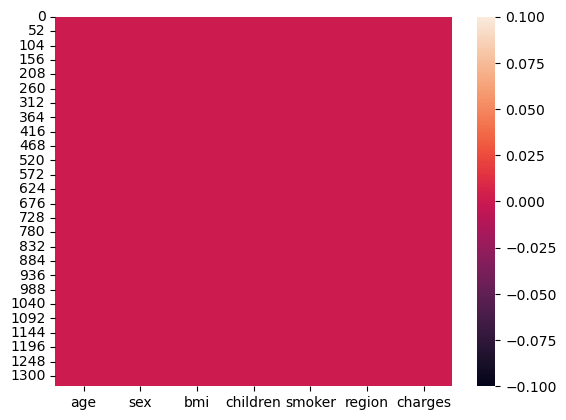

In [14]:
#graphical representaion of null values
sns.heatmap(med_data.isnull())

In [15]:
#summarizes the count, mean, standard deviation, min, and max for numeric variables.
med_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


#From abaove analysis, we can note there are 1337 unique rows with 7 columns 
#All count is equal so there is no null values present in the dataset.

#We can also note that our SD in Age and BMI column is large (data may be skewed)

#The Mean is greater than the Median (50th percentile ) in all the columns except 'region', this shows that the data is right sided skewed specially in "Charges". Here The Age, bmi and children column is skewed to the right.

#There is a large difference between the 75% (quantile 3) and max values in "Charges" column,which indicates there is skewness in the data.There are possible outliers because the margin between the Q3 values and max values for some columns such as bmi


Data Visualization

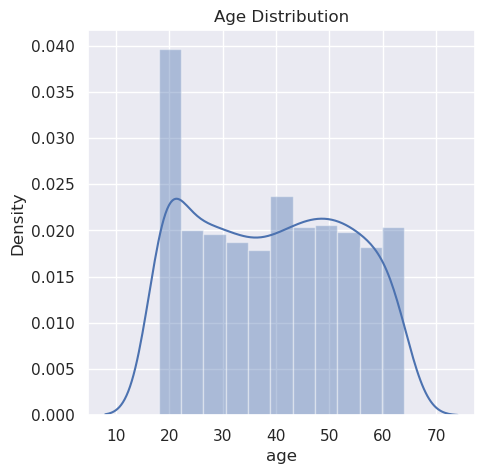

In [146]:
# Analysis of age
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(med_data['age'])
plt.title('Age Distribution')
plt.show()

From the above graph we can observe that more number of age group people are between 20 to 23

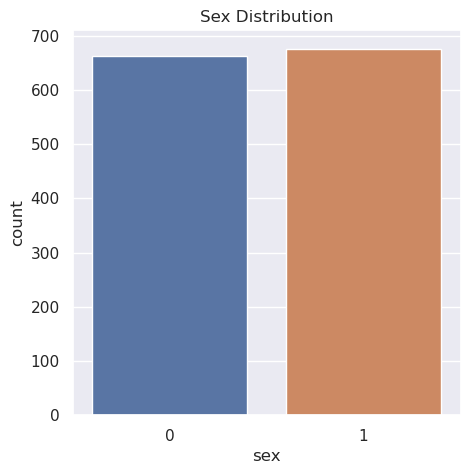

In [142]:
# Analysis for sex
plt.figure(figsize=(5,5))
sns.countplot(x = 'sex', data = med_data)
plt.title('Sex Distribution')
plt.show()

From the above plot we can observe that there is not much of difference betwwn male and female count.

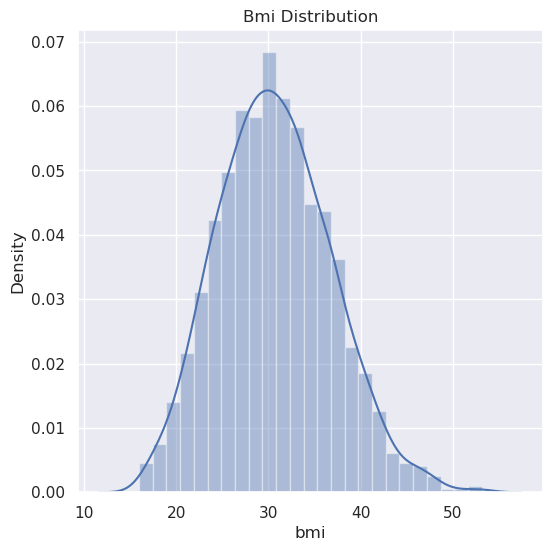

In [159]:
# BMI
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(med_data['bmi'])
plt.title('Bmi Distribution')
plt.show()

From the above data we can see that it is a normal distribution data by the bell curve.

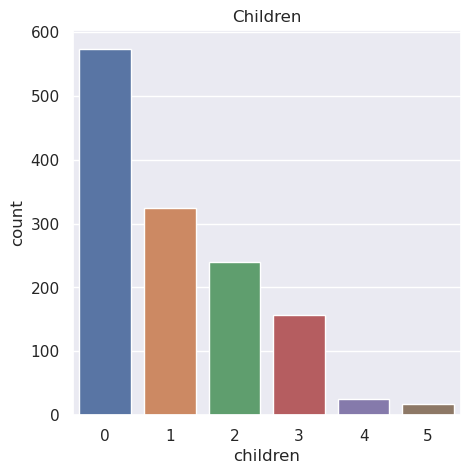

In [149]:
# Analysis for children
plt.figure(figsize=(5,5))
sns.countplot(x = 'children', data = med_data)
plt.title('Children')
plt.show()

From the above data se we can observe that there are most number of people who dont have child

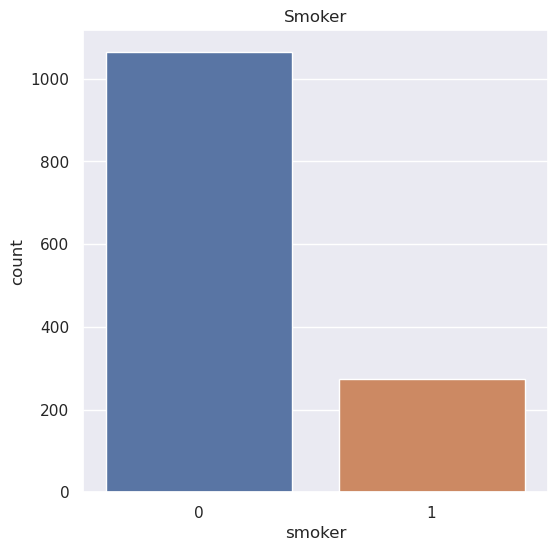

In [158]:
# Smoker Column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker', data=med_data)
plt.title('Smoker')
plt.show()


From the data we can observe that there are more number of non smokers than the number of smokers.

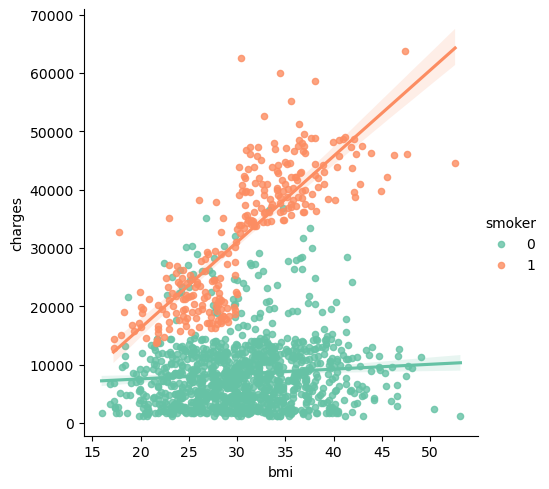

In [96]:
sns.lmplot( x='bmi',y='charges', data=med_data, hue='smoker', palette='Set2', scatter_kws={"s": 20})
plt.show()

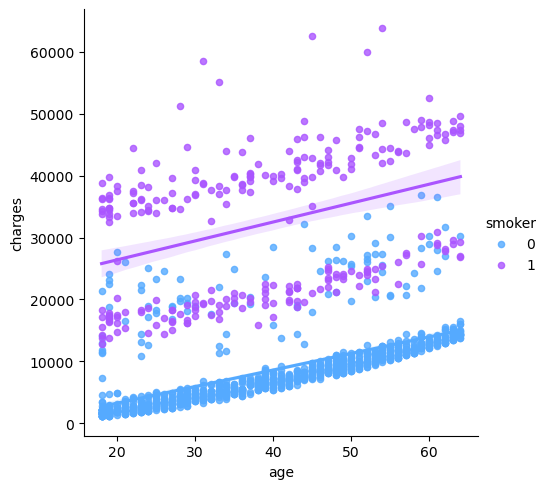

In [93]:
sns.lmplot(x='age', y='charges', hue='smoker', data=med_data, palette='cool', scatter_kws={"s": 20})
plt.show()

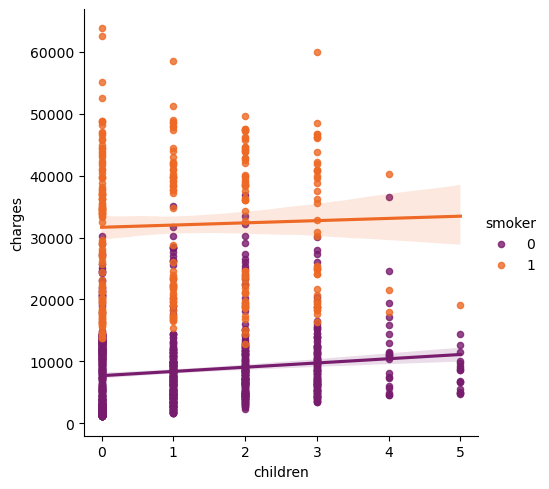

In [95]:
sns.lmplot(x='children', y='charges', hue='smoker', data=med_data, palette='inferno', scatter_kws={"s": 20})
plt.show()

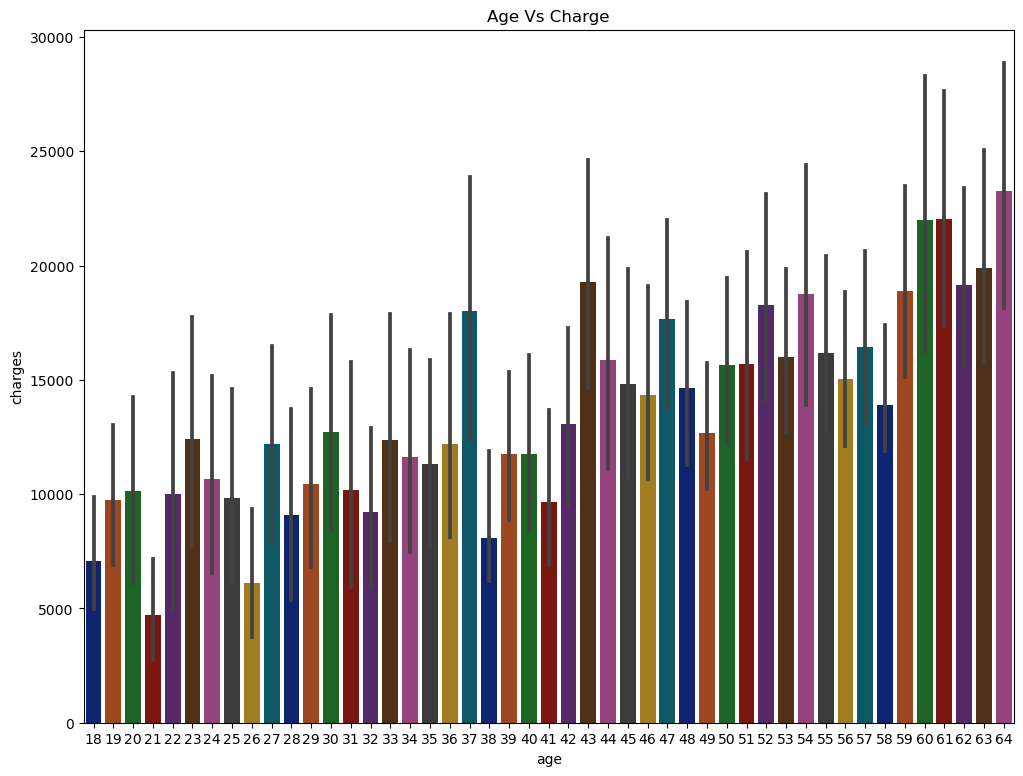

In [138]:
#"Age" with "Charges "

plt.figure(figsize=(12,9))
plt.title('Age Vs Charge')
sns.barplot(x ='age',y ='charges',data = med_data , palette = 'dark')
plt.show()

The general trend seems to be that 'medical charges' increase with age. However, there is significant variation at every age, and it's clear that age alone cannot be used to accurately determine medical charges.
"Charges" increase as the "Age" Increases. hence ,this shows a positive relationship.

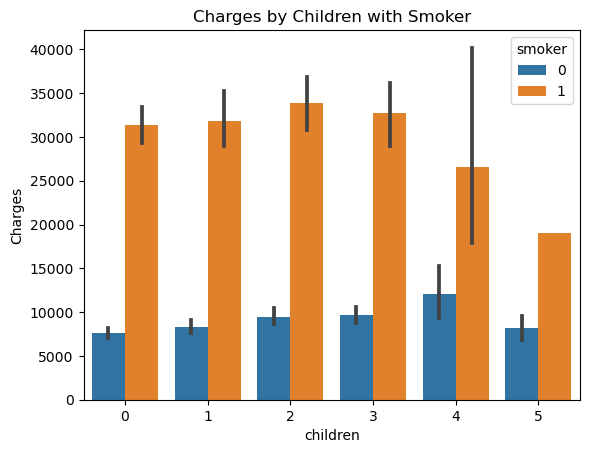

In [133]:
# visiualising Charges by children with smoker.
plt.figsize=(10, 6)
sns.barplot(x="children", y="charges", hue="smoker", data=med_data)
plt.ylabel("Charges")
plt.title("Charges by Children with Smoker")
plt.show()

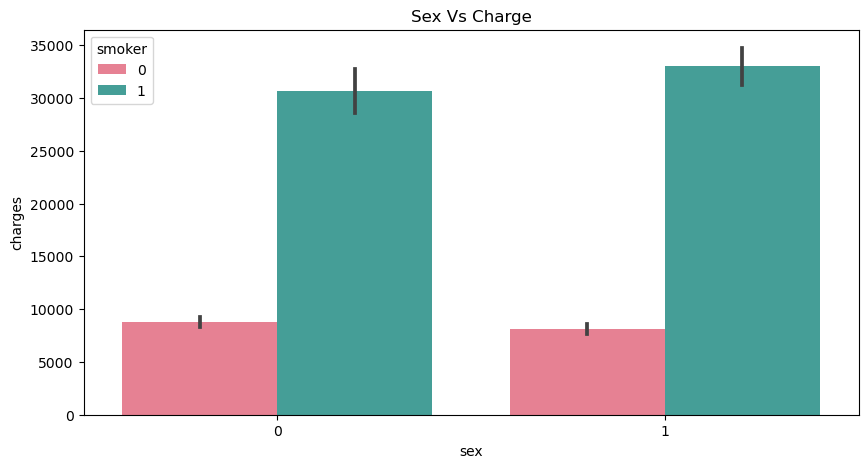

In [131]:
#"Smoker" with "charges" 
plt.figure(figsize=(10,5))
plt.title('Sex Vs Charge')
sns.barplot(x ='sex',y ='charges',hue= "smoker", data = med_data , palette = 'husl')
plt.show()

The above representation of graph depicits that pattern of both male and female with smoking habits.
This clearly shows that both male and female with smoking habits has more medical cost billed by health insurance as it seems to be more prevant among males than females with smoking habit.

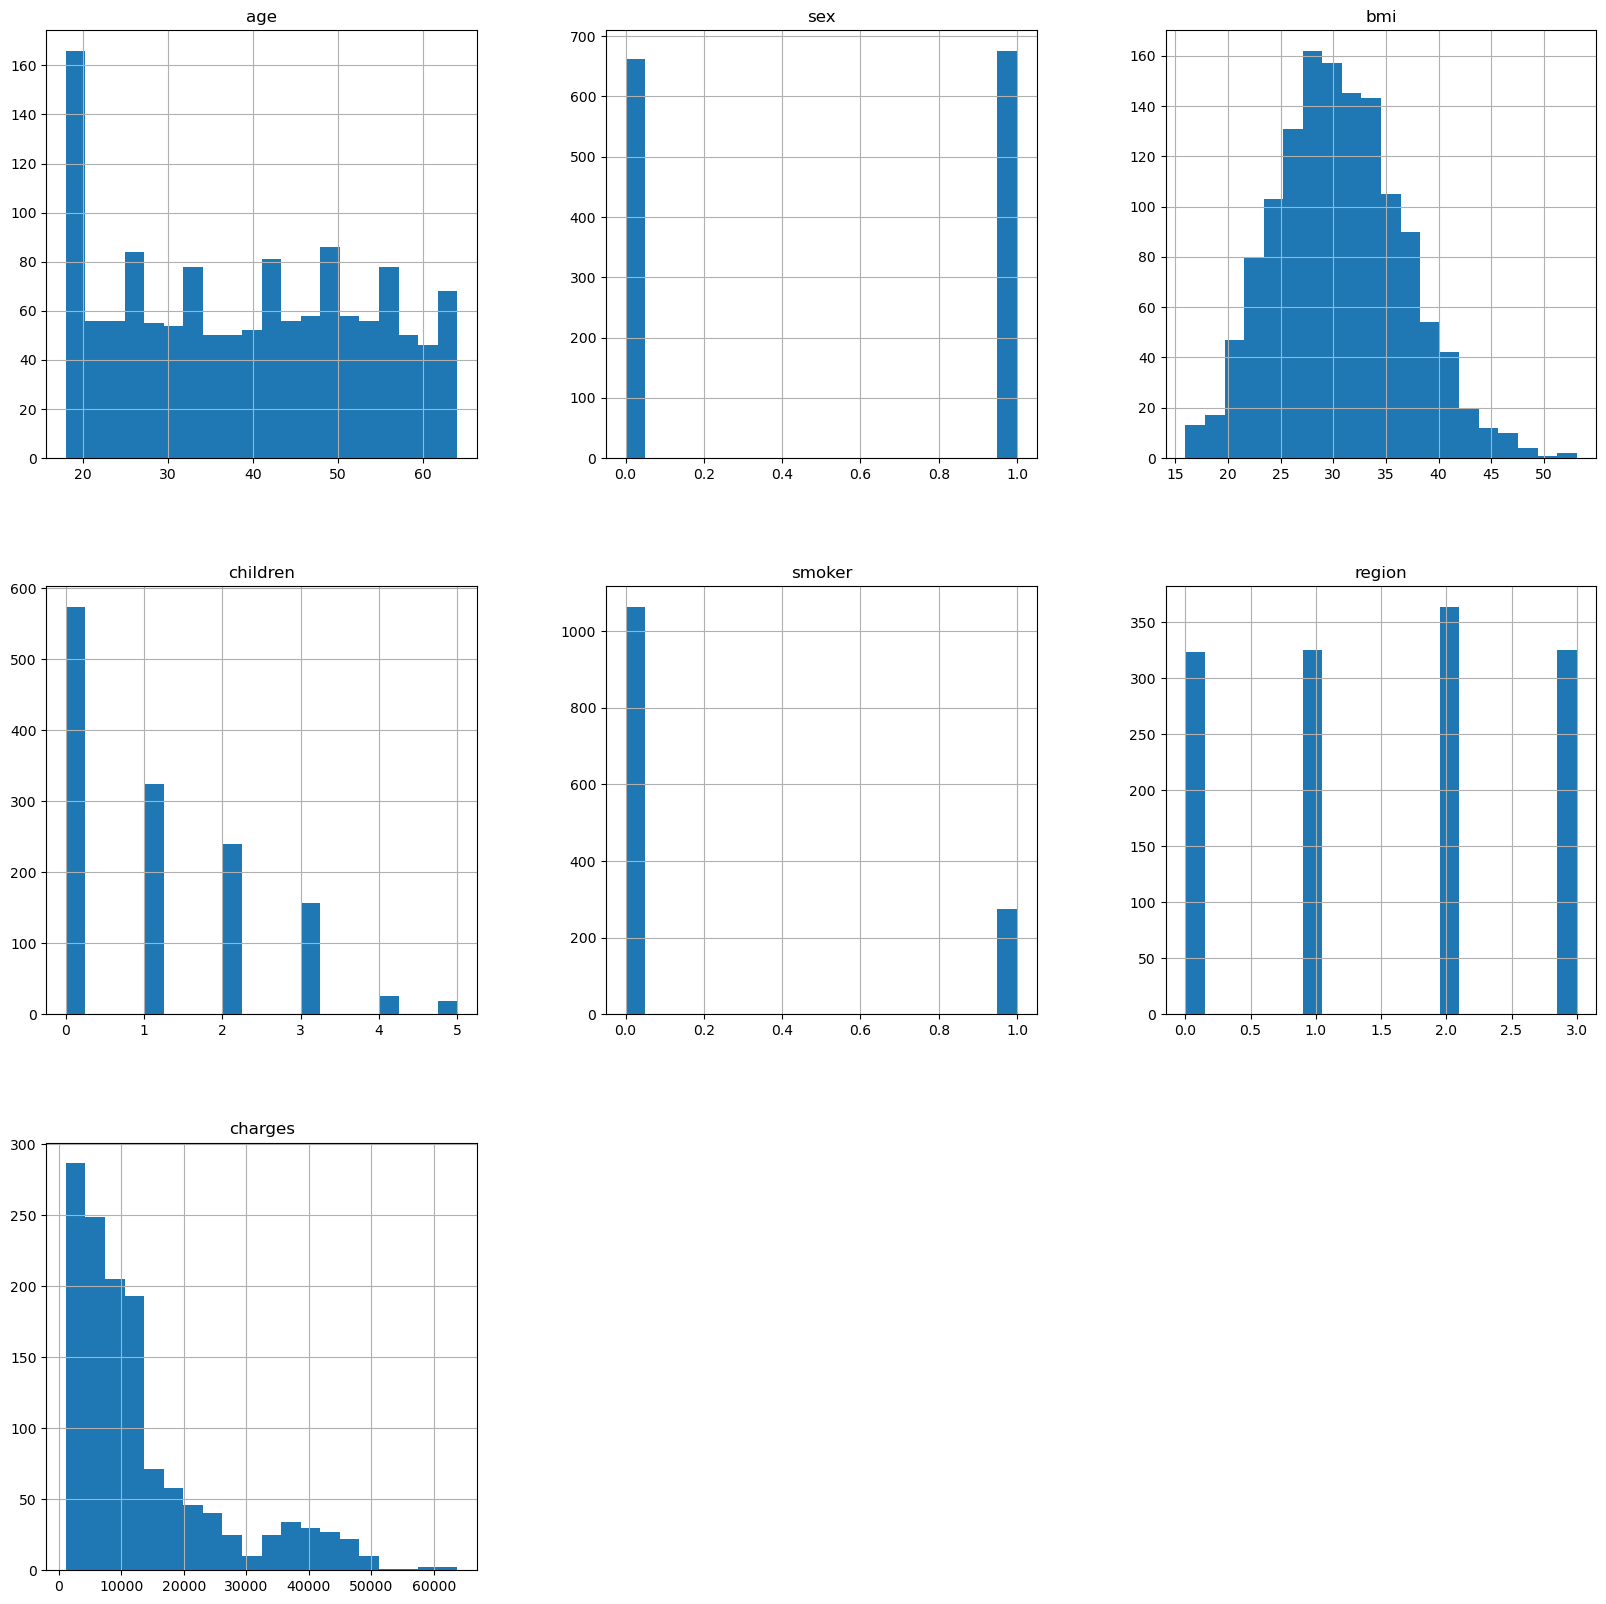

In [19]:
med_data.hist(bins=20,figsize=(20,20))
plt.show()

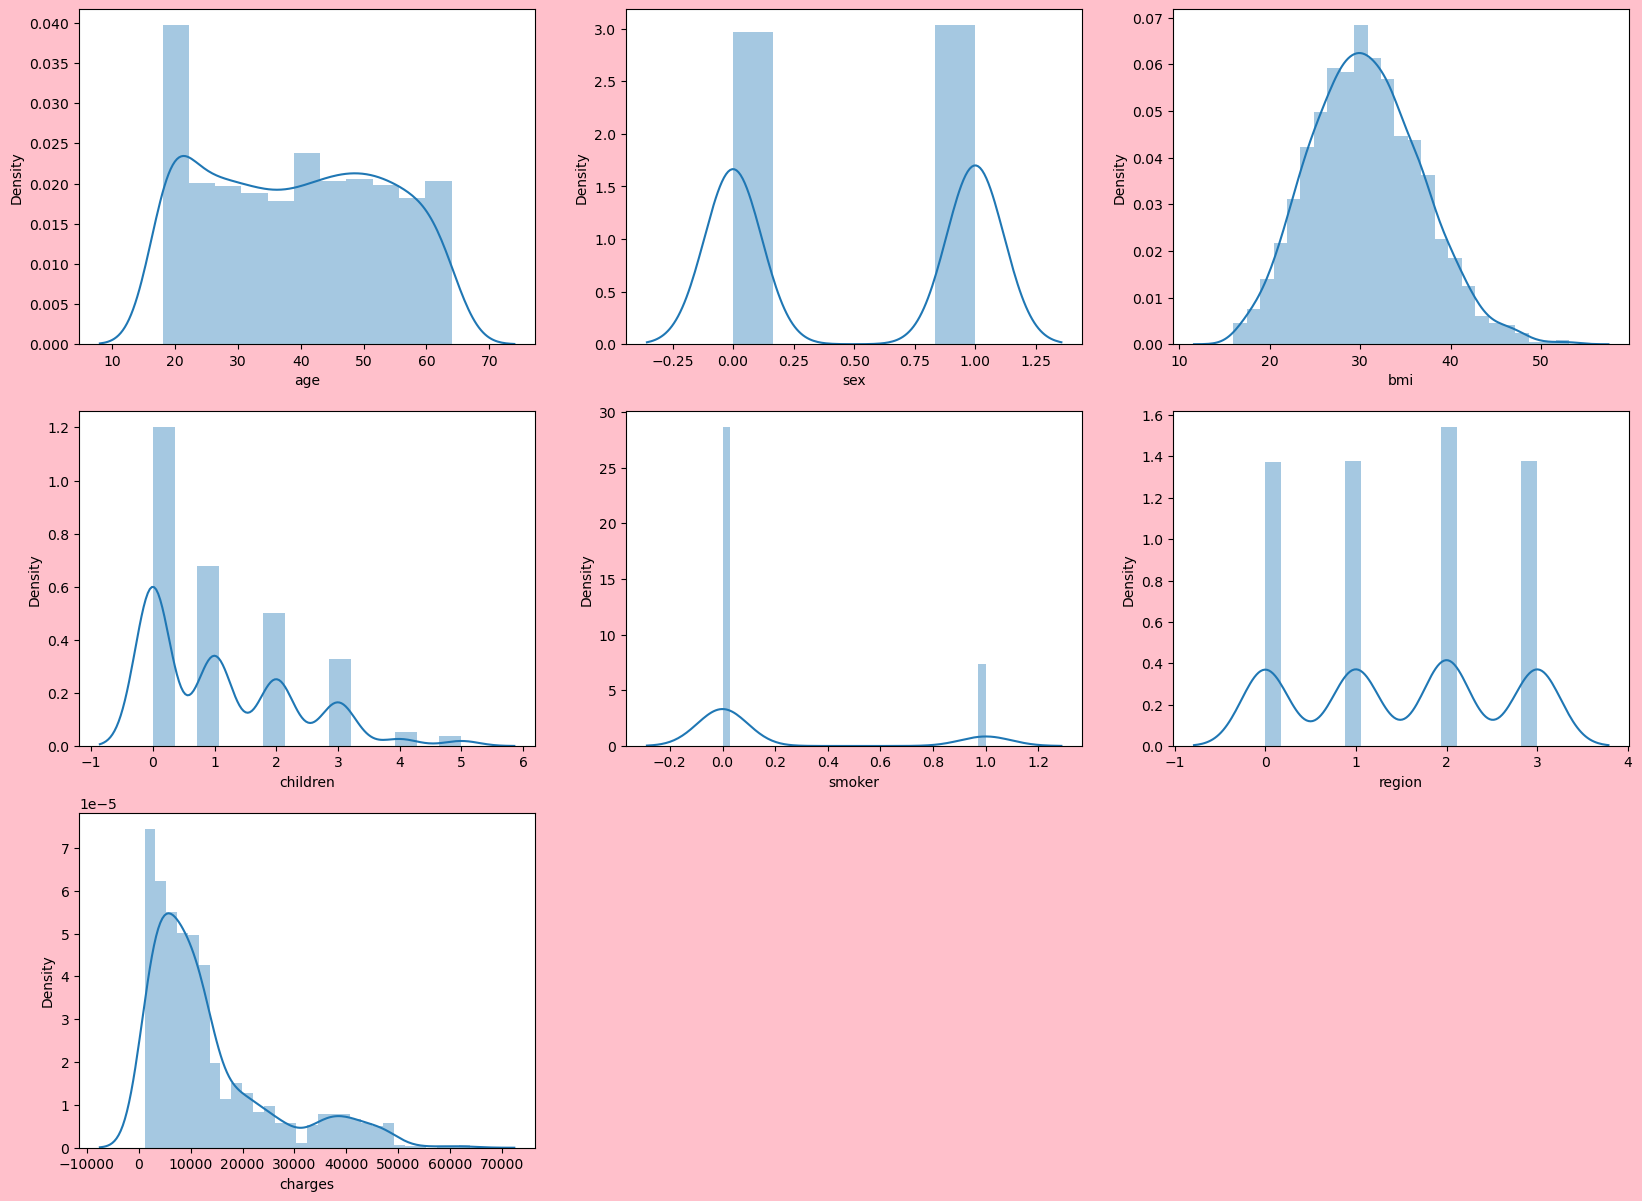

In [56]:
# using distplot
plt.figure(figsize=(20,20),facecolor='pink')
plotnumber=1
for column in med_data:
    if plotnumber<=12:
        ax=plt.subplot(4,3,plotnumber)
        sns.distplot(med_data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

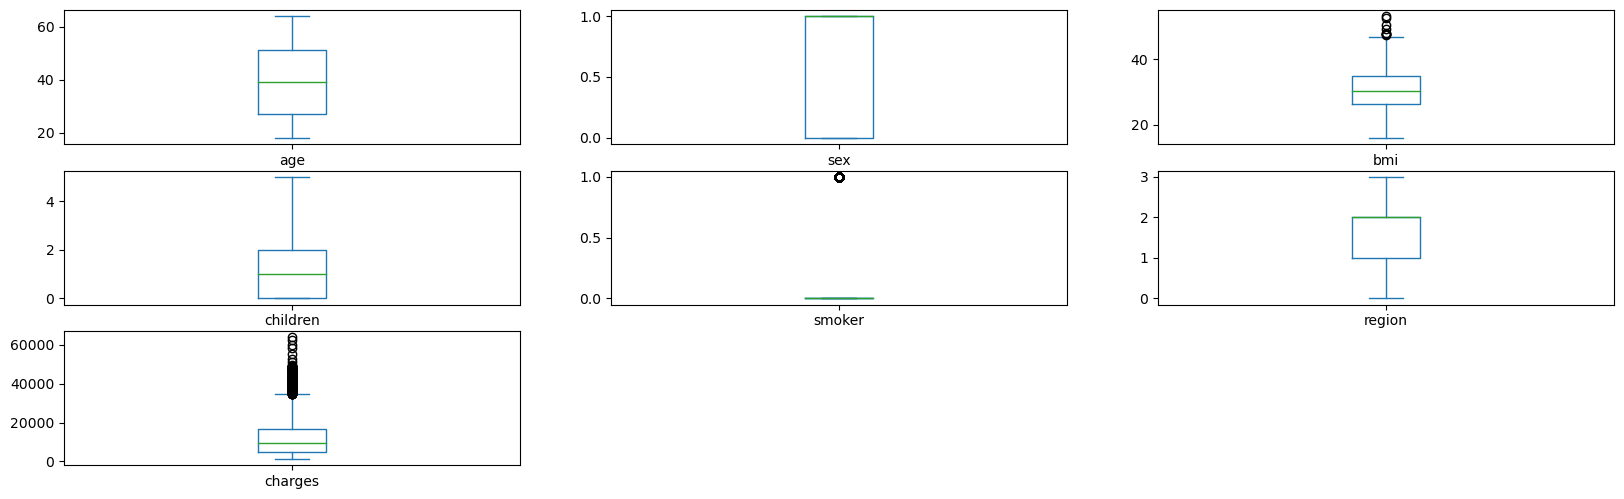

In [75]:
med_data.plot(kind='box', subplots=True, layout=(4,3), legend=True, figsize=(20,8))
plt.show()

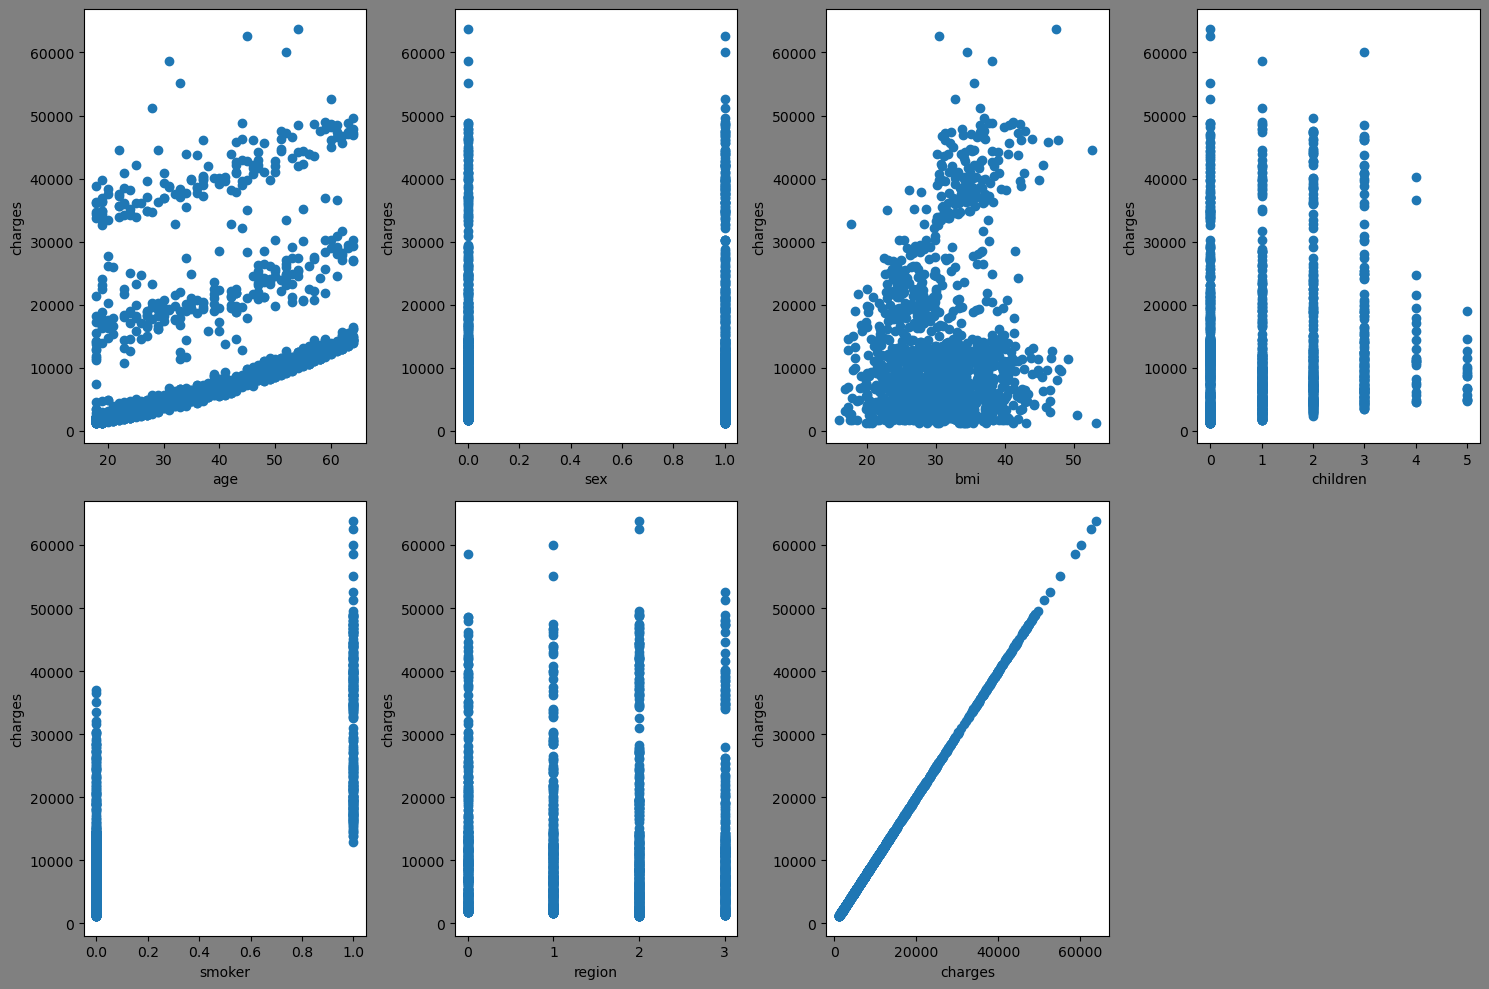

In [89]:
plt.figure(figsize = (15,10), facecolor='grey')
plotnumber = 1

for column in med_data:
    if plotnumber<=8 :
        ax = plt.subplot(2,4,plotnumber)
        plt.scatter(med_data[column],med_data['charges'])
        plt.xlabel(column,fontsize=10)
        plt.ylabel('charges',fontsize=10)
    plotnumber+=1
plt.tight_layout()

In [58]:
med_data.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


<AxesSubplot:>

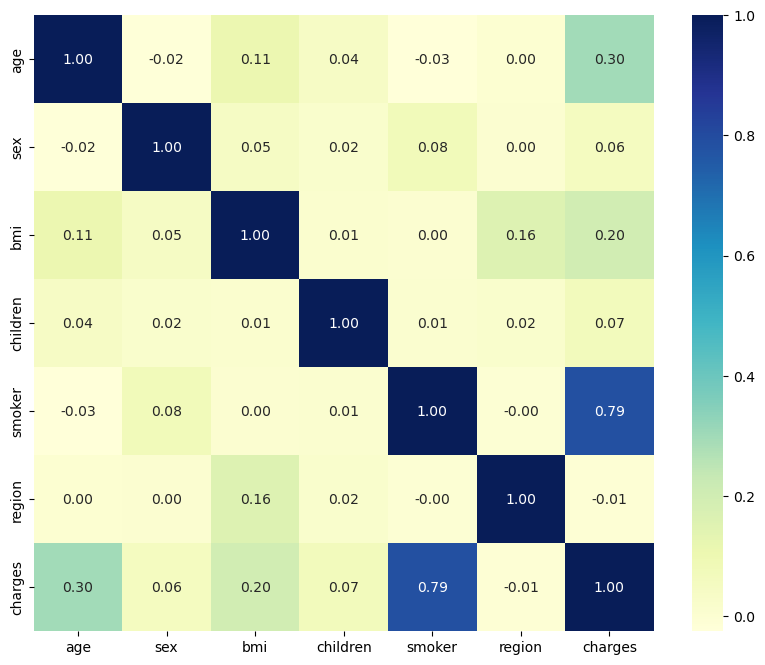

In [129]:
plt.figure(figsize=(10,8))
sns.heatmap(med_data.corr(),annot=True,fmt='0.2f',cmap="YlGnBu" )

'Smoker','age' and 'BMI' are positively correlated to each other.
These are the most important factors that determines "Charges"(target variable).
"Sex","Children" and "religion" donot affect the target variable "Charges " as these have less correlation.

In [23]:
med_data.corr()['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

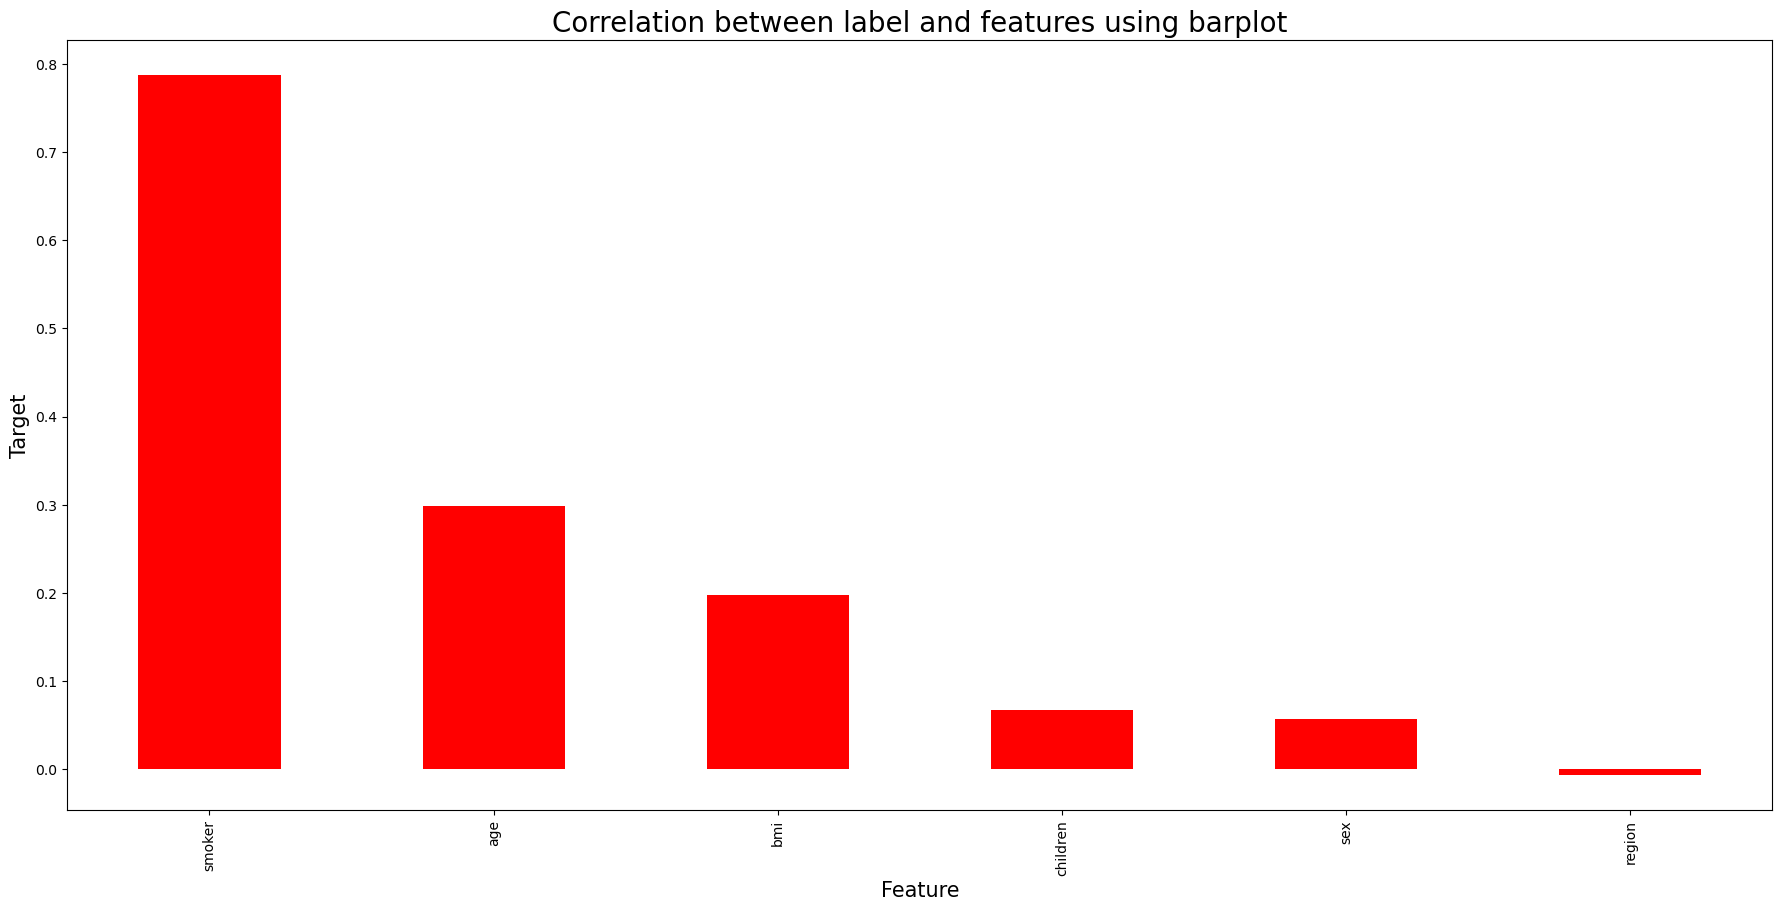

In [24]:
plt.figure(figsize = (22,10))
med_data.corr()['charges'].sort_values(ascending = False).drop(['charges']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize = 15)
plt.ylabel('Target',fontsize = 15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

#Correlation is highest in smoker and least in region

In [25]:
#Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(med_data))
z
threshold=3
np.where(z>3)

(array([  32,   34,   71,  116,  166,  413,  425,  438,  543,  568,  577,
         640,  819,  847,  877,  932,  937,  969,  984, 1047, 1085, 1116,
        1130, 1146, 1230, 1245, 1272, 1300, 1317]),
 array([3, 6, 3, 2, 3, 3, 3, 3, 6, 3, 6, 3, 6, 2, 3, 3, 3, 3, 3, 2, 3, 3,
        3, 6, 6, 3, 3, 6, 2]))

In [26]:
df=med_data[(z<3).all(axis=1)]
df.shape

(1309, 7)

In [128]:
print('percentage of loss of data by zscore is :',(med_data.shape[0]-df.shape[0])/med_data.shape[0])

percentage of loss of data by zscore is : 0.021674140508221227


In [27]:
x=df.drop('charges',axis=1)
y=df['charges']

In [28]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [29]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1309, dtype: float64

In [30]:
med_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns = x.columns)
x

,age,sex,bmi,children,smoker,region
0,-1.439063,-1.005362,-0.449359,-0.929616,1.984848,1.352753
1,-1.510086,0.994667,0.533391,-0.040093,-0.503817,0.447460
2,-0.799859,0.994667,0.404478,1.738954,-0.503817,0.447460
3,-0.444746,0.994667,-1.319101,-0.929616,-0.503817,-0.457833
4,-0.515769,0.994667,-0.285288,-0.929616,-0.503817,-0.457833
...,...,...,...,...,...,...
1304,0.762639,0.994667,0.064617,1.738954,-0.503817,-0.457833
1305,-1.510086,-1.005362,0.223666,-0.929616,-0.503817,-1.363127
1306,-1.510086,-1.005362,1.049041,-0.929616,-0.503817,0.447460
1307,-1.297018,-1.005362,-0.800939,-0.929616,-0.503817,1.352753


By doing Feature Scaling , we have scaled the data using standard scaler to overcome the issues of biasness.

In [32]:
#Checking Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns

vif

,VIF values,Features
0,1.019082,age
1,1.008815,sex
2,1.043841,bmi
3,1.005176,children
4,1.007983,smoker
5,1.026656,region


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model  import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.model_selection  import GridSearchCV

In [113]:

#Finding the best random state 
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.30, random_state = i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Max. r2 score is ",maxAccu,"at random_state",maxRS)

Max. r2 score is  0.8163956888560486 at random_state 27


In [114]:
#Now splitting the dataset into the Training set and test set
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=27)

In [124]:
print('Size of X_train : ', x_train.shape)
print('Size of y_train : ', y_train.shape)
print('Size of X_test : ', x_test.shape)
print('Size of Y_test : ', y_test.shape)

Size of X_train :  (916, 6)
Size of y_train :  (916,)
Size of X_test :  (393, 6)
Size of Y_test :  (393,)


In [115]:
lr= LinearRegression()
lr.fit(x_train,y_train)
pred_lr=lr.predict(x_test)
pred_train = lr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_lr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_lr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_lr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_lr)))
score = cross_val_score(lr,x,y,cv=5,scoring='r2')
print("Cross val score: ",score,"is ", score.mean())

R2 score:  0.8163956888560486
R2 score on training data:  72.38854306117616
Mean Absolute Error:  3779.430994123086
Mean Squared Error:  25743369.30524331
Root Mean Squared Error:  5073.792398713541
Cross val score:  [0.76337332 0.71273583 0.78072916 0.73045788 0.76622267] is  0.7507037701961409


In [116]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
pred_train = rf.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_rf))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rf))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rf))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rf)))
score1 = cross_val_score(rf,x,y)
print("Cross val score: ",score1,"is ", score1.mean())

R2 score:  0.9025333418392514
R2 score on training data:  97.20960944168391
Mean Absolute Error:  2172.8757281236644
Mean Squared Error:  13665911.003651941
Root Mean Squared Error:  3696.7432969644974
Cross val score:  [0.85383881 0.78190208 0.85616563 0.83260494 0.85104552] is  0.8351113955228865


In [117]:
gr = GradientBoostingRegressor()
gr.fit(x_train,y_train)
pred_gr = gr.predict(x_test)
pred_train = gr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_gr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_gr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_gr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_gr)))
score2 = cross_val_score(gr,x,y)
print("Cross val score: ",score2,"is ", score2.mean())

R2 score:  0.9178951315957906
R2 score on training data:  88.23247988431767
Mean Absolute Error:  2089.3571311364117
Mean Squared Error:  11512016.988701299
Root Mean Squared Error:  3392.936337260294
Cross val score:  [0.87801961 0.80532932 0.88378728 0.84520941 0.8638385 ] is  0.8552368235273515


In [118]:
ls = Lasso()
ls.fit(x_train,y_train)
pred_ls = ls.predict(x_test)
pred_train = ls.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_ls))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_ls))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_ls))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_ls)))
score3 = cross_val_score(ls,x,y)
print("Cross val score: ",score3,"is ", score3.mean())

R2 score:  0.8163895454880018
R2 score on training data:  72.38853846348161
Mean Absolute Error:  3779.367639974441
Mean Squared Error:  25744230.673864905
Root Mean Squared Error:  5073.877282105363
Cross val score:  [0.76337505 0.71275985 0.7807142  0.73045566 0.76622802] is  0.7507065591488712


In [119]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_rd = rd.predict(x_test)
pred_train = rd.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_rd))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_rd))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_rd))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_rd)))
score4 = cross_val_score(rd,x,y)
print("Cross val score: ",score4,"is ", score4.mean())

R2 score:  0.8163104433411098
R2 score on training data:  72.38845328685264
Mean Absolute Error:  3781.271062388362
Mean Squared Error:  25755321.67585495
Root Mean Squared Error:  5074.970115759791
Cross val score:  [0.7633537  0.71279257 0.78063397 0.73052688 0.76622221] is  0.750705866775889


In [120]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_etr = etr.predict(x_test)
pred_train = etr.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_etr))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_etr))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_etr))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_etr)))
score5 = cross_val_score(etr,x,y)
print("Cross val score: ",score5,"is ", score5.mean())

R2 score:  0.8796759583759262
R2 score on training data:  100.0
Mean Absolute Error:  2183.5962704900776
Mean Squared Error:  16870770.738054357
Root Mean Squared Error:  4107.404379660512
Cross val score:  [0.83658931 0.75369318 0.83513227 0.81036134 0.84085947] is  0.8153271136201313


In [121]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn = knn.predict(x_test)
pred_train = knn.predict(x_train)
print('R2 score: ',r2_score(y_test,pred_knn))
print('R2 score on training data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred_knn)))
score6 = cross_val_score(knn,x,y)
print("Cross val score: ",score6,"is ", score6.mean())

R2 score:  0.8776882712263787
R2 score on training data:  84.4547409810903
Mean Absolute Error:  2708.0761341450384
Mean Squared Error:  17149466.61417661
Root Mean Squared Error:  4141.191448626422
Cross val score:  [0.83079348 0.7715433  0.82577205 0.79640205 0.82468182] is  0.8098385424947064


In [122]:
final_data = pd.DataFrame({'Model':['LR','RF','GBR','Lasso','Ridge','ETR','KNN'],
                    'R2 score':[r2_score(y_test,pred_lr)*100,
                                r2_score(y_test,pred_rf)*100,
                               r2_score(y_test,pred_gr)*100,
                               r2_score(y_test,pred_ls)*100,
                               r2_score(y_test,pred_rd)*100,
                                r2_score(y_test,pred_etr)*100,
                               r2_score(y_test,pred_knn)*100],
                    'Cross_val_score':[score.mean()*100,score1.mean()*100,score2.mean()*100,score3.mean()*100,score4.mean()*100,
                                      score5.mean()*100,score6.mean()*100]})
final_data['Score_diff'] = final_data['R2 score'] - final_data['Cross_val_score']

In [123]:
final_data

,Model,R2 score,Cross_val_score,Score_diff
0,LR,81.639569,75.070377,6.569192
1,RF,90.253334,83.511140,6.742195
2,GBR,91.789513,85.523682,6.265831
3,Lasso,81.638955,75.070656,6.568299
4,Ridge,81.631044,75.070587,6.560458
5,ETR,87.967596,81.532711,6.434884
6,KNN,87.768827,80.983854,6.784973


HyperParameter tuning

In [44]:
lamda =  {'n_estimators': [500, 600, 700,800],
               'learning_rate': [0.005, 0.01, 0.02],
               'max_depth': [1, 2, 4, 8],
               'subsample': [0.500, 0.600, 0.700]}
model = GradientBoostingRegressor()
gsv = GridSearchCV(estimator = model, param_grid = lamda , cv=5)
gsv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.005, 0.01, 0.02],
                         'max_depth': [1, 2, 4, 8],
                         'n_estimators': [500, 600, 700, 800],
                         'subsample': [0.5, 0.6, 0.7]})

In [45]:
gsv.best_params_

{'learning_rate': 0.01, 'max_depth': 2, 'n_estimators': 700, 'subsample': 0.7}

In [50]:
model = GradientBoostingRegressor(n_estimators = 700, learning_rate = 0.01, max_depth = 2, subsample = 0.700)

In [51]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
print('R2 score: ',r2_score(y_test,pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,pred))
print('Mean Squared Error: ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error: ',np.sqrt(mean_squared_error(y_test,pred)))

R2 score:  0.92495386811017
Mean Absolute Error:  2185.7977350720757
Mean Squared Error:  10522303.513097748
Root Mean Squared Error:  3243.8100303651795


In [52]:
r2_score(y_test,pred)*100

92.495386811017

Prediction

In [188]:
input_data = (60,1,36.005,0,1,2)

# Changing input_data to numpy array
data= np.asarray(input_data)

# Reshaping the array 
reshaped = data.reshape(1,-1)

pred_data = model.predict(reshaped)
print(pred_data)

print('The Insurance Cost is USD', pred_data[0])

[46435.13104421]
The Insurance Cost is USD 46435.13104421499
